In [181]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, diff, lambdify, cos, sin, log
from prettytable import PrettyTable

#Relatório 1


**Nome:** Yasmin Souza Camargo


##Métodos

In [182]:
def bisseccao(f, a, b, precisao, n, exibir_grafico=True):
  print ('\n--- Método da bissecção ---\n')
  if (f(a) * f(b)) >= 0:  # Verifica se a função muda de sinal
    return 'Não é possível calcular'

  k = 1           # Inicializa o contador de iterações
  valoresX = []   # Lista para armazenar os pontos das iterações
  limiteA = a     # Salva limites A e B
  limiteB = b

  tabela = PrettyTable(['n', 'a', 'b', 'x', 'f(x)', 'f(a)', 'f(a) * f(x)']) # Criando uma tabela

  if abs(b - a) < precisao:
      x = a

  while (k <= n and abs(b - a) >= precisao):
    x = (a + b) / 2     # Calcula o ponto médio do intervalo
    valoresX.append(x)  # Adiciona o ponto médio à lista de pontos

    tabela.add_row([k, a, b, x, f(x), f(a), f(a) * f(x)]) # Adiciona linhas à tabela

    # Verifica a mudança de sinal para determinar o novo intervalo
    if f(a)*f(x) > 0:
      a = x
    else:
      b = x

    k += 1

  if exibir_grafico == True:
    # Calcula valores de y para plotar gráfico
    valoresY = [f(i) for i in valoresX]
    grafico(limiteA, limiteB, f, valoresX, valoresY, 'bisseccao', ultimo_ponto=(valoresX[-1], valoresY[-1]))

  print(tabela)

  print('\nRESULTADO ')
  return x


In [183]:
def falsaPosicao(f, a, b, precisao, n, exibir_grafico=True):
  print ('\n--- Método da falsa posição ---\n')
  if (f(a) * f(b)) >= 0:     # Verifica se a função muda de sinal
    return 'Não é possível calcular'

  k = 1           # Inicializa o contador de iterações
  valoresX = []   # Lista para armazenar os pontos das iterações
  limiteA = a     # Salva limites A e B
  limiteB = b

  tabela = PrettyTable(['n', 'a', 'b', 'x', 'f(x)', 'f(a) * f(x)']) # Criando uma tabela

  if abs(b - a) < precisao:
    x = a

  while (k <= n and abs(b - a) >= precisao):
    x = ((a * f(b)) - (b * f(a))) / (f(b) - f(a)) # Calcula o próximo ponto usando a fórmula
    valoresX.append(x)

    tabela.add_row([k, a, b, x, f(x), f(a) * f(x)]) # Adiciona linhas à tabela

    # Verifica a mudança de sinal para determinar o novo intervalo
    if f(a)*f(x) > 0:
      a = x
    else:
      b = x

    k += 1

  if exibir_grafico == True:
    # Calcula valores de y para plotar gráfico
    valoresY = [f(i) for i in valoresX]
    grafico(limiteA, limiteB, f, valoresX, valoresY, 'falsa posição', ultimo_ponto=(valoresX[-1], valoresY[-1]))

  print(tabela)

  print('\nRESULTADO ')
  return x

In [184]:
def newtonRaphson(f, x0, precisao, n, exibir_grafico=True):
  print ('\n--- Método de Newton Raphson ---\n')
  if abs(f(x0)) < precisao: # Verifica se o ponto inicial já está dentro da precisão desejada
    print('\nRESULTADO ')
    return x1

  k = 1                   # Inicializa o contador de iterações
  valoresX = []           # Lista para armazenar os pontos das iterações
  x = symbols('x')        # Definindo símbolo x
  limiteA = x0            # Salva limites

  # derivada = lambdify(x, diff(f(x), x), 'numpy')  # Calculando derivada e transfomando em uma função lambda

  # Calculando derivada
  def derivada(x_temp):
      return diff(f(x), x).subs(x, x_temp)

  tabela = PrettyTable(['n', 'x^(x0)', 'f(x^(0))', 'f\'(x^(0))', 'x1']) # Criando uma tabela

  # Calcula o próximo ponto de iteração usando o método de Newton-Raphson
  x1 = x0 - (f(x0)/derivada(x0))
  valoresX.append(x0)

  while k <= n and abs(f(x1)) >= precisao and abs(x1 - x0) >= precisao:
    tabela.add_row([k, x0, f(x0), derivada(x0),x1]) # Adiciona linhas à tabela

    valoresX.append(x1)
    x0 = x1
    x1 = x0 - (f(x0)/derivada(x0))  # Calcula o próximo ponto usando a fórmula

    k = k + 1

  tabela.add_row([k, x0, f(x0), derivada(x0), x1]) # Adiciona linhas à tabela
  valoresX.append(x1)

  if exibir_grafico == True:
    # Calcula valores de y para plotar gráfico
    valoresY = [f(i) for i in valoresX]
    grafico(limiteA - 1, float(x1) + 1, f, valoresX, valoresY, 'newton raphson', ultimo_ponto=(valoresX[-1], valoresY[-1]))

  print(tabela)

  print('\nRESULTADO ')
  return x1

In [185]:
def secante(f, x0, x1, precisao, n, exibir_grafico=True):
  print ('\n--- Método da Secante ---\n')
  # Verifica se os pontos iniciais já estão dentro da precisão desejada
  if abs(f(x0)) < precisao:
    print('\nRESULTADO ')
    return x0
  elif abs(f(x1)) < precisao or abs(x1 - x0) < precisao:
    print('\nRESULTADO ')
    return x1

  k = 1                   # Inicializa o contador de iterações
  valoresX = []           # Lista para armazenar os pontos das iterações
  valoresX.append(x0)
  limiteA = x0     # Salva limites A e B
  limiteB = x1

  tabela = PrettyTable(['n', 'x0', 'f(x0)', 'f(x1)', 'x2']) # Criando uma tabela

  # Calcula o próximo ponto de iteração usando o método da secante
  x2 = x1 - (f(x1) / (f(x1) - f(x0))) * (x1 - x0)

  while k < n and abs(f(x2)) >= precisao and abs(x2 - x1) >= precisao:
    tabela.add_row([k, x0, f(x0), x1, x2]) # Adiciona linhas à tabela
    valoresX.append(x2)

    x0 = x1
    x1 = x2
    x2 = x1 - (f(x1) / (f(x1) - f(x0))) * (x1 - x0)

    k = k + 1

  tabela.add_row([k, x0, f(x0), x1, x2]) # Adiciona linhas à tabela

  if exibir_grafico == True:
    # Calcula valores de y para plotar gráfico
    valoresY = [f(i) for i in valoresX]
    grafico(limiteA - 1, limiteB + 1, f, valoresX, valoresY, 'secante', ultimo_ponto=(valoresX[-1], valoresY[-1]))

  print(tabela)

  print('\nRESULTADO ')
  return x2

####Gráfico

In [186]:
def grafico(a, b, f, pontox=None, pontosy=None, metodo=None, ultimo_ponto=None):
  x = np.linspace(a, b, 100)     # Gera uma série de pontos x para plotar a função

  y = []      # Calcula os valores de y correspondentes à função
  for valor in x:
    y.append(f(valor))

  plt.plot(x, y, label='Função', linewidth=3)  # Plota a função

  if (pontox is not None or pontox is not None):
    plt.scatter(pontox[:-1], pontosy[:-1], color='red', label='Pontos das iterações')         # Adiciona pontos das iterações ao gráfico (em vermelho)
  if (ultimo_ponto is not None):
    plt.scatter(ultimo_ponto[0], ultimo_ponto[1], color='green', label='Solução encontrada')  # Adiciona o último ponto (solução encontrada) em verde

  # Adiciona linhas de referência no eixo x e y
  plt.axhline(0, color='black', linewidth=0.5)
  plt.axvline(0, color='black', linewidth=0.5)
  plt.grid(color='gray', linestyle='--', linewidth=0.5)

  # Adiciona título e rótulos
  if (ultimo_ponto is None):
    plt.title(f'Gráfico da Função')
  else:
    plt.title(f'Gráfico da Função - Método {metodo}')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.legend()

  print("\n\n")
  plt.show()

##Questões

###Questão 1
**A população de uma determinada bactéria segue a forma da seguinte função:**

\begin{equation}
P(t) =
\begin{cases}
    e^t & \text{se } 0 \leq t < 3 \\
    \frac{a \cdot t + 3}{t + 5} & \text{se } t \geq 3
\end{cases}
\end{equation}

**Use o Método da Bissecção para encontrar o valor de a.**

**Observação: Comece traçando um gráfico para encontrar um intervalo apropriado para a raiz. Utilize tol = 0,0001**



Antes de tudo, vale ressaltar que, de acordo com o método da bisseção, a existência de uma raiz requer que a função f(x) seja contínua no intervalo [a,b]. Isso porque a continuidade vai assegurar a existência de um valor para a função em todo ponto do intervalo. A função P(t), apresentada nesta questão, não atende a essa condição, pois é descontínua em t=3, devido à presença de duas definições distintas para a função nesse ponto. Assim, a primeira das condições essenciais para a aplicação do método da bisseção não está sendo satisfeita.

Para contornar esse problema, é necessário ajustar a definição da função para garantir que a função seja contínua em t=3. Deve ser escolhido esse ponto porque é o local onde as duas partes da função se encontram, o local onde a transição ocorre. Garantir que as duas partes se igualem nesse ponto específico torna a função contínua, pois não há salto ou descontinuidade nesse valor. Caso isso não seja feito, o método da bisseção pode não convergir adequadamente, comprometendo a precisão na determinação das raízes da função.

Dessa forma, o que fiz foi igualar as duas partes da função e substituir t = 3. Resultando na seguinte função lambda:





In [187]:
p = lambda a: (8 * (math.e ** 3)) - 3 - (3 * a)

Uma vez estabelecido a função, foi desenvolvido um método dedicado à geração de gráficos, disponível na seção "Métodos" sob o nome "grafico". Este método foi criado de forma genérica para reaproveitá-lo nas próximas questões. Vamos plotar o gráfico dessa função para analizar o seu comportamento:

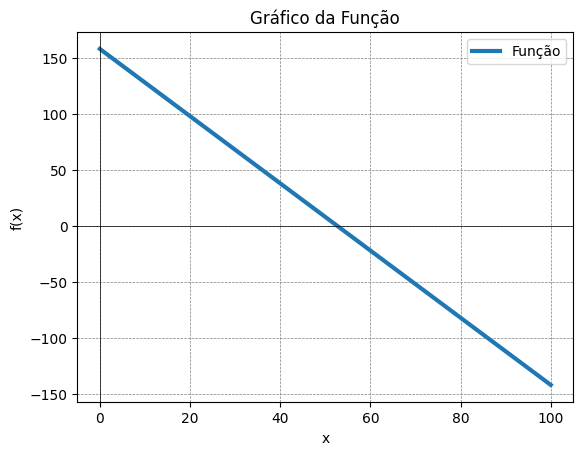

In [188]:
grafico(0.0, 100.0, p)

Com este gráfico conseguimos observar que o ponto que corta o eixo x está entre 40 e 60, sendo possível executar o método da bisseção com este intervalo. Para chamar o método da bisseção, é necessário fornecer como parâmetros a função na qual se pretende aplicar o método, juntamente com os limites a e b, a precisão desejada e o número máximo de iterações que o algoritmo deve realizar.

Vale destacar que, nos métodos apresentados neste trabalho, não foi estabelecido um número específico de casas decimais para os cálculos. Como resultado, o arredondamento ou truncamento não foi explicitamente realizado. No entanto, é importante observar que essas operações podem ocorrer implicitamente ao executar operações matemáticas em Python, seguindo as normas padrão adotadas pela linguagem.


--- Método da bissecção ---






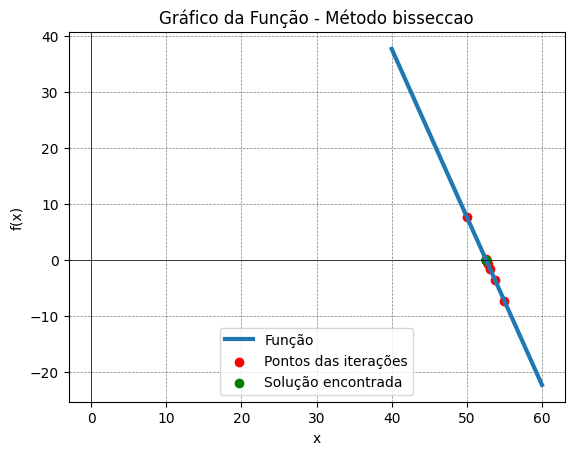

+----+-------------------+--------------------+--------------------+-------------------------+------------------------+-------------------------+
| n  |         a         |         b          |         x          |           f(x)          |          f(a)          |       f(a) * f(x)       |
+----+-------------------+--------------------+--------------------+-------------------------+------------------------+-------------------------+
| 1  |        40.0       |        60.0        |        50.0        |    7.684295385501315    |   37.684295385501315   |    289.5772571366762    |
| 2  |        50.0       |        60.0        |        55.0        |    -7.315704614498685   |   7.684295385501315    |    -56.21603521088292   |
| 3  |        50.0       |        55.0        |        52.5        |   0.18429538550131497   |   7.684295385501315    |    1.4161801803769405   |
| 4  |        52.5       |        55.0        |       53.75        |    -3.565704614498685   |  0.18429538550131497   |   -0

In [189]:
print(bisseccao(p, 40.0, 60.0, 0.0001, 100))

Com este resultado o valor de "a" da população de uma determinada bactéria é igual a 52.56141662597656, sendo que o método da bisseção precisou de 18 iterações para encontrar o valor na precisão informada.

###Questão 2
**Aplique o Método de Newton-Raphson para calcular a raiz de f(x) com tol = 0,001.**

\begin{equation}
f(x) = x^3 - 100 \cos(x)
\end{equation}


>**a) considere x0 = 1**

>**b) considere x0 = -1**

**O que acontece quando os valores de estimativa inicial são alterados? Justifique sua resposta.**

Antes de iniciar a análise, é importante salientar que o Método de Newton-Raphson demanda o cálculo da derivada da função. Para realizar essa tarefa, utilizou-se a biblioteca *sympy* em conjunto do método *diff* do Python. Para chamar o método de Newton-Raphson, é necessário fornecer como parâmetros a função na qual se pretende aplicar o método, seguido do ponto inicial x0, a precisão desejada e o número máximo de iterações que o algoritmo deve realizar.

A construção da função lambda e a execução do método para questão letra "a" e letra "b" foi a seguinte:


--- Método de Newton Raphson ---






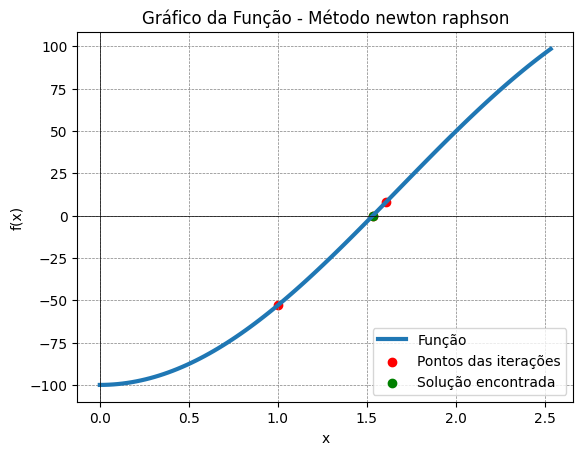

+---+------------------+--------------------+------------------+------------------+
| n |      x^(x0)      |      f(x^(0))      |    f'(x^(0))     |        x1        |
+---+------------------+--------------------+------------------+------------------+
| 1 |       1.0        | -53.0302305868140  | 87.1470984807897 | 1.60851401264385 |
| 2 | 1.60851401264385 |  7.93261052584299  | 107.690829227669 | 1.53485304649907 |
| 3 | 1.53485304649907 | 0.0222125586816841 | 107.002732607221 | 1.53464545779417 |
+---+------------------+--------------------+------------------+------------------+

RESULTADO 
1.53464545779417

--- Método de Newton Raphson ---






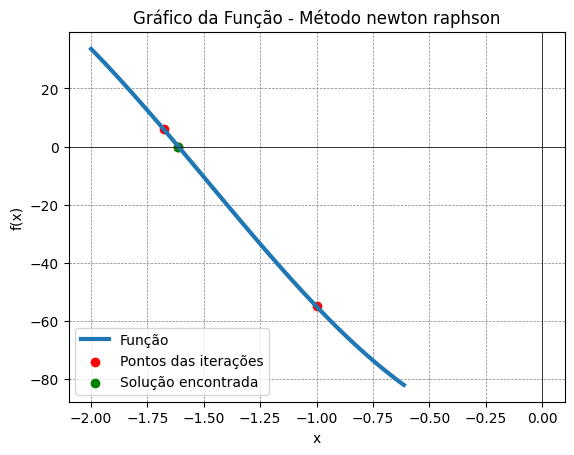

+---+-------------------+---------------------+-------------------+-------------------+
| n |       x^(x0)      |       f(x^(0))      |     f'(x^(0))     |         x1        |
+---+-------------------+---------------------+-------------------+-------------------+
| 1 |        -1.0       |  -55.0302305868140  | -81.1470984807897 | -1.67815401434029 |
| 2 | -1.67815401434029 |   5.98913897051021  | -90.9756669508487 | -1.61232169707081 |
| 3 | -1.61232169707081 | -0.0400175389556123 | -92.1150508051115 | -1.61275612704296 |
+---+-------------------+---------------------+-------------------+-------------------+

RESULTADO 
-1.61275612704296


In [190]:
f = lambda x: x**3 - 100 * cos(x)

print(newtonRaphson(f, 1.0, 0.001, 5))
print(newtonRaphson(f, -1.0, 0.001, 5))

Ao observar os resultados obtidos para *x0 = 1.5346* e *x0 = -1.6127*, nota-se diferenças significativas nos valores. Isso pode ocorrer porque a função fornecida pode ter mais de uma raiz.
Portanto, os diferentes pontos iniciais influenciam a trajetória seguida pelo método na busca por uma raiz, convergindo para raízes distintas da função.

Para uma compreensão mais aprofundada dessa questão, podemos ampliar a visualização por meio de um gráfico abrangendo um intervalo mais amplo de valores:

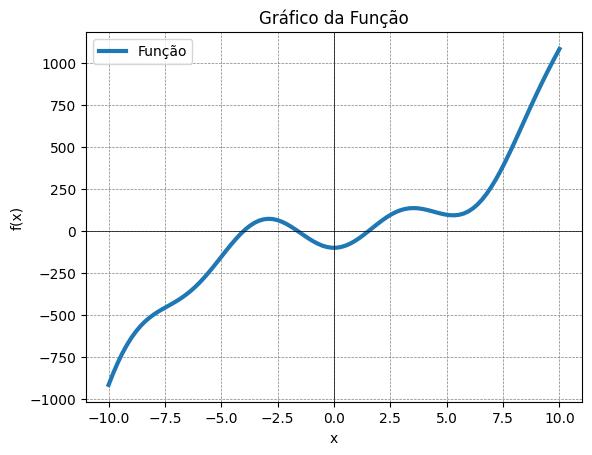

In [191]:
grafico(-10.0, 10.0, f)

Ao analisar o gráfico, torna-se evidente que a função não possui apenas uma raiz, mas sim três. Consequentemente, dependendo do valor inicial x0 escolhido, é possível encontrar três raízes distintas. O Método de Newton-Raphson, ao ser aplicado, converge para a raiz mais próxima do ponto inicial fornecido. Portanto, ao escolher um valor como -5 (apenas para fins de testes), é esperado que o método encontre a terceira raiz, dada sua proximidade a esse ponto específico.


--- Método de Newton Raphson ---






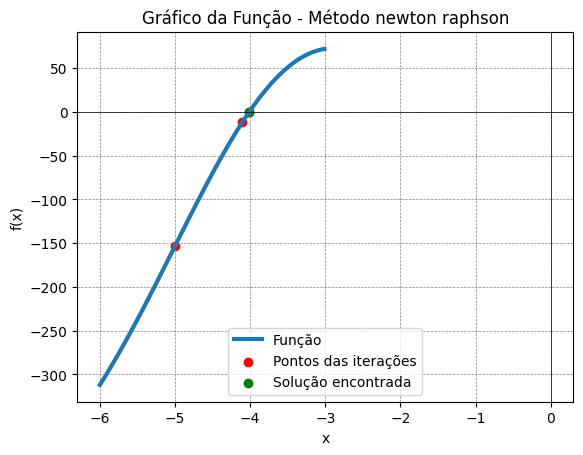

+---+-------------------+--------------------+------------------+-------------------+
| n |       x^(x0)      |      f(x^(0))      |    f'(x^(0))     |         x1        |
+---+-------------------+--------------------+------------------+-------------------+
| 1 |        -5.0       | -153.366218546323  | 170.892427466314 | -4.10255696627310 |
| 2 | -4.10255696627310 | -11.7770519724395  | 132.467344977480 | -4.01365164417699 |
| 3 | -4.01365164417699 | -0.332374332067417 | 124.893699333906 | -4.01099038637263 |
+---+-------------------+--------------------+------------------+-------------------+

RESULTADO 
-4.01099038637263


In [192]:
print(newtonRaphson(f, -5.0, 0.001, 5))

###Questão 3
**Você está projetando um tanque esférico (Figura abaixo) para armazenar água
para uma pequena cidade num país em desenvolvimento**

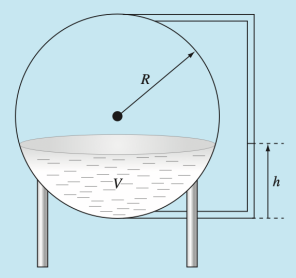

**O volume de líquido que ele pode armazenar pode ser calculado por**
\begin{equation}
V = \pi \cdot h^2 \cdot \frac{3R - h}{3}
\end{equation}

**Onde V é o volume (m^3), h é a profundidade de água no tanque (m) e R é o raio do tanque (m).**

**Se R = 3m, até qual profundidade o tanque deve ser enchido para conter 30 m^3? Use três iterações do Método da Falsa Posição para obter a resposta. Determine o erro relativo aproximado após cada iteração.**


Para abordar esta questão, iniciei criando uma função lambda, substituindo os valores de r e v fornecidos na questão e igualando a função a zero. Uma vez que os limites a e b não foram especificados, antes de aplicarmos o método, é prudente analisar o comportamento da função por meio de sua representação gráfica. Para isso, forneci um intervalo abrangente de -10 a 10.

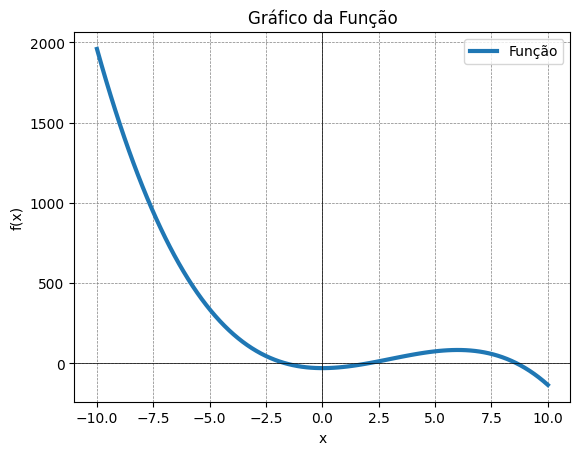

In [193]:
g = lambda h: (math.pi * (h**2) * ((3 * 3 - h)/3)) - 30
grafico(-10.0, 10.0, g)

Ao observar a função, identificamos a presença de três raízes. Portanto, optei por selecionar a raiz presente no intervalo de 0 a 5 para a execução do método, realizando o total especificado de 3 iterações.


--- Método da falsa posição ---






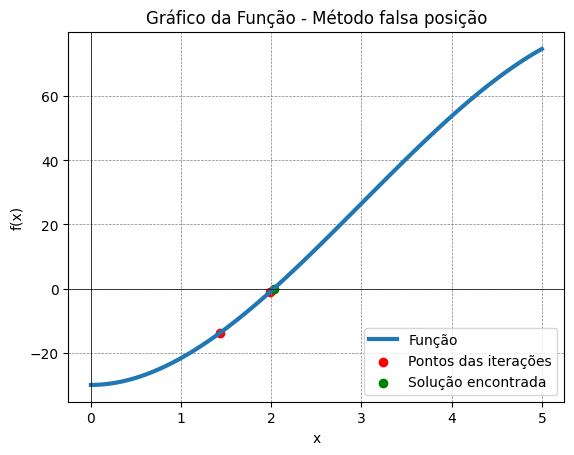

+---+--------------------+-----+--------------------+-----------------------+------------------------+
| n |         a          |  b  |         x          |          f(x)         |      f(a) * f(x)       |
+---+--------------------+-----+--------------------+-----------------------+------------------------+
| 1 |        0.0         | 5.0 | 1.4323944878270582 |  -13.740305367470722  |   412.20916102412167   |
| 2 | 1.4323944878270582 | 5.0 | 1.9865427542648775 |   -1.016114554651793  |   13.961724269247151   |
| 3 | 1.9865427542648775 | 5.0 | 2.0269729728704076 | 0.0017012689674658077 | -0.0017286841592194348 |
+---+--------------------+-----+--------------------+-----------------------+------------------------+

RESULTADO 


2.0269729728704076

In [194]:
falsaPosicao(g, 0.0, 5.0, 0.00001, 3)

Sendo assim, segundo o método da falsa posição (estabelecido um limite de 3 iterações) a profundidade em que o tanque deve ser enchido para conter 30m^3 é de 2.0269.

Na segunda parte desta questão deve-se calcular o erro relativo aproximado de cada iteração. O erro relativo é uma medida que expressa a precisão de uma aproximação em relação ao valor exato. Um erro relativo baixo indica uma boa aproximação, enquanto um erro relativo elevado sugere uma aproximação menos precisa.

Para calcular o erro relativo aproximado após cada iteração, utilizaremos a seguinte fórmula:

In [195]:
def erro_relativo(valor_atual, valor_anterior):
  return (abs(valor_atual - valor_anterior) / abs(valor_atual)) * 100

Como o exercício não incluiu o valor exato da função, entrei em contato com a professora para esclarecer qual valor exato deveria ser utilizado. Ela orientou que "*Para calcular o erro relativo você deve utilizar o valor x da iteração atual e o valor de x da iteração anterior*".

Dessa maneira, organizei os resultados das iterações em uma lista e procedi com o cálculo do erro conforme as instruções fornecidas.

In [196]:
resultados_iterações = [0.0, 1.4323944878270582, 1.9865427542648775, 2.0269729728704076]

print('Iteração \t Erro relativo \n-----------------------------------')
for cont in range(1, len(resultados_iterações)):
  print(f'{cont} \t\t {erro_relativo(resultados_iterações[cont], resultados_iterações[cont-1]):.2f} %')

Iteração 	 Erro relativo 
-----------------------------------
1 		 100.00 %
2 		 27.90 %
3 		 1.99 %


O erro relativo na primeira iteração é significativamente alto, indicando uma diferença considerável entre o valor aproximado obtido pelo método e o valor de referência. Na segunda iteração ocorre uma redução significativa no erro relativo em comparação com a iteração anterior, indicando que o método está convergindo para uma solução mais precisa. Na ultima iteração o erro relativo atingiu um valor ainda mais baixo, indicando que o resultado atual está muito mais próximo do valor verdadeiro em comparação com as iterações anteriores.

Esses valores destacam a natureza da aproximação dos métodos numéricos, pois a solução obtida não representa o valor exato, mas sim uma estimativa. Dessa forma, evidencia-se a tendência de diminuição do erro relativo a cada iteração à medida que o método se aproxima da solução. Logo, se quisermos um valor mais preciso (erro próximo a zero) devemos executar o método com um número maior de iterações.

Essa característica ressalta a importância de interpretar o erro relativo em relação à precisão necessária para o contexto específico do problema.

###Questão 4

**A recolha de energia solar através da focagem de um campo plano de espelhos
numa central de recolha foi estudada por Vant-Hull (1976). A equação para a
concentração geométrica do fator C é dada por:**

\begin{equation}
C = \frac{\pi \cdot \left(\frac{h}{\cos(A)}\right)^2 \cdot F}{0.5 \cdot \pi \cdot D^2 \cdot \left(1 + \sin(A) - 0.5 \cdot \cos(A)\right)}
\end{equation}

**Em que A é o ângulo do campo, F é a cobertura da fração do campo com
espelhos, D é o diâmetro do coletor e h é o comprimento do coletor.
Considerando h = 300, F = 0,8 e D = 14, calcule o ângulo positivo A inferior a π/25 para o qual a concentração do fator C é 1200. Utilize o método iterativo mais
adequado e considere no critério de paragem ε1 = ε2 = 10^−3 ou no máximo 3
iterações.**


Inicialmente, elaborou-se uma expressão lambda, incorporando os valores de
h, f, d e C fornecidos na questão e igualando a função resultante a zero. Para chamar o método foi utilizado o limite de no máximo três iterações, e levando em consideração a precisão informada de 0.001, sendo que o objetivo é encontrar a raiz da função.

A escolha do método mais adequado depende das características específicas da função. Como nesse caso temos a exigência de que o angulo seja positivo e inferior a π/25 é interessante a utilização de métodos que garantem convergência para um intervalo específico. O Método de Newton-Raphson e o Método da Secante, embora se destaquem por sua potencial rapidez, focam na busca da raiz mais próxima da condição inicial, sem assegurar necessariamente que essa raiz esteja contida no intervalo desejado. Dessa forma, a escolha deles pode levar a soluções fora do intervalo pretendido.

Portanto, a minha escolha será o método da Falsa Posição pois ele costuma ser mais rápido que o da bisseção devido à sua abordagem de interpolação linear. Ao mesmo tempo que mantém a garantia de que a solução estará contida no intervalo estipulado.


--- Método da falsa posição ---






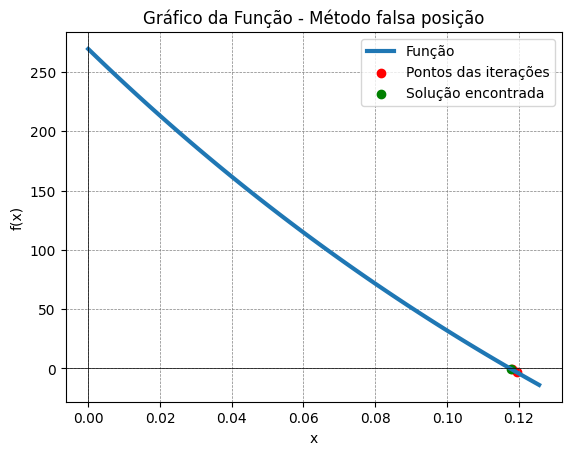

+---+-----+---------------------+-------------------+--------------------+-------------------+
| n |  a  |          b          |         x         |        f(x)        |    f(a) * f(x)    |
+---+-----+---------------------+-------------------+--------------------+-------------------+
| 1 | 0.0 | 0.12566370614359174 | 0.119521142647775 | -3.33115663554736  | -897.372807943371 |
| 2 | 0.0 |  0.119521142647775  | 0.118061237850991 | -0.790299829521018 | -212.897096932193 |
| 3 | 0.0 |  0.118061237850991  | 0.117715896049747 | -0.186867110696539 | -50.3397114529454 |
+---+-----+---------------------+-------------------+--------------------+-------------------+

RESULTADO 


0.117715896049747

In [197]:
c = lambda A: ((math.pi * ((300/cos(A))**2) * 0.8) / (0.5 * math.pi * 196 * (1 + sin(A) -0.5 * cos(A)))) - 1200
#grafico(0,math.pi/25,c)
falsaPosicao(c, 0.0, float(math.pi/25), 0.001, 3)

Ao executar o método temos como resposta um ângulo de 0.1177, atendendo aos requisitos da questão: ser positivo e inferior a π/25.

###Questão 5
**Compare os Métodos da Bissecção, Métodos da Falsa Posição, Métodos de
Newton-Raphson e Métodos da Secante quando aplicados nas funções abaixo.
Para isso, utilize em todos os método o mesmo critério de parada, o número
máximo de iterações 500 e tolerância de 10^-10. Para o Método de Newton,
considere x0 como o ponto médio do intervalo dado**

**a)**
\begin{equation}
f(x) = 2x^4 + 4x^3 + 3x^2 - 10x - 15, \quad x \in [0, 3]
\end{equation}

**b)**
\begin{equation}
f(x) = \sin(x) \cdot x + 4, \quad x \in [1, 5]
\end{equation}

**c)**
\begin{equation}
f(x) = (x - 3)^5 \ln(x), \quad x \in [2, 5]
\end{equation}



Conforme feito nas questões anteriores, inicialmente foram construídas as funções lambda. Todas essas funções serão executadas a seguir e analisadas posteriormente:

In [198]:
fa = lambda x: 2*x**4 + 4*x**3 + 3*x**2 - 10*x - 15
fb = lambda x: sin(x) * x + 4
fc = lambda x: (x - 3)**5 * log(x)

print(bisseccao(fa, 0.0, 3.0, 0.0000000001, 500, False))
print(falsaPosicao(fa, 0.0, 3.0, 0.0000000001, 500, False))
print(newtonRaphson(fa, 1.5, 0.0000000001, 500, False))
print(secante(fa, 0.0, 3.0, 0.0000000001, 500, False))


--- Método da bissecção ---

+----+--------------------+--------------------+--------------------+-------------------------+-------------------------+-------------------------+
| n  |         a          |         b          |         x          |           f(x)          |           f(a)          |       f(a) * f(x)       |
+----+--------------------+--------------------+--------------------+-------------------------+-------------------------+-------------------------+
| 1  |        0.0         |        3.0         |        1.5         |          0.375          |          -15.0          |          -5.625         |
| 2  |        0.0         |        1.5         |        0.75        |       -18.4921875       |          -15.0          |       277.3828125       |
| 3  |        0.75        |        1.5         |       1.125        |     -13.55419921875     |       -18.4921875       |    250.64679336547852   |
| 4  |       1.125        |        1.5         |       1.3125       |    -7.977996

Executando, agora, para a letra b

In [199]:
print(bisseccao(fb, 1.0, 5.0, 0.0000000001, 500, False))
print(falsaPosicao(fb, 1.0, 5.0, 0.0000000001, 500, False))
print(newtonRaphson(fb, 3.0, 0.0000000001, 500, False))
print(secante(fb, 1.0, 5.0, 0.0000000001, 500, False))


--- Método da bissecção ---

+----+--------------------+-------------------+--------------------+-----------------------+----------------------+-----------------------+
| n  |         a          |         b         |         x          |          f(x)         |         f(a)         |      f(a) * f(x)      |
+----+--------------------+-------------------+--------------------+-----------------------+----------------------+-----------------------+
| 1  |        1.0         |        5.0        |        3.0         |    4.42336002417960   |   4.84147098480790   |    21.4155692124247   |
| 2  |        3.0         |        5.0        |        4.0         |   0.972790018768287   |   4.42336002417960   |    4.30300048094057   |
| 3  |        4.0         |        5.0        |        4.5         |   -0.398885529492937  |  0.972790018768287   |   -0.388031861721832  |
| 4  |        4.0         |        4.5        |        4.25        |   0.196295227528520   |  0.972790018768287   |   0.1909540380

Executando, agora, para a letra c

In [200]:
print(bisseccao(fc, 2.0, 5.0, 0.0000000001, 500, False))
print(falsaPosicao(fc, 2.0, 5.0, 0.0000000001, 500, False))
print(newtonRaphson(fc, 3.5, 0.0000000001, 500, False))
print(secante(fc, 2.0, 5.0, 0.0000000001, 500, False))


--- Método da bissecção ---

+----+--------------------+--------------------+--------------------+-----------------------+-----------------------+------------------------+
| n  |         a          |         b          |         x          |          f(x)         |          f(a)         |      f(a) * f(x)       |
+----+--------------------+--------------------+--------------------+-----------------------+-----------------------+------------------------+
| 1  |        2.0         |        5.0         |        3.5         |   0.0391488427654803  |   -0.693147180559945  |  -0.0271359099850772   |
| 2  |        2.0         |        3.5         |        2.75        | -0.000987891515311016 |   -0.693147180559945  |  0.000684754218536922  |
| 3  |        2.75        |        3.5         |       3.125        |  3.47727747555043e-5  | -0.000987891515311016 |  -3.43517291447838e-8  |
| 4  |        2.75        |       3.125        |       2.9375       |  -1.02764022776630e-6 | -0.000987891515311

Para analisar esta questão e aprimorar a visualização dos dados, empreguei a biblioteca *prettytable* do Python para organizar as informações em uma tabela. Cada linha dessa tabela representa as execuções dos exercícios A, B e C, apresentando os resultados finais e o número de iterações correspondente.

In [201]:
# Criar uma tabela
tabela = PrettyTable()

# Adicionar colunas
tabela.field_names = ["", "Bissecção", "Falsa posição", "Newton Raphson", "Secante"]

# Adicionar linhas
tabela.add_row(["Resultado", 1.4928787086100783, 1.492878708663604, 1.49287870866360, -1.3003841326429082])
tabela.add_row(["Num Iterações", 35, 100, 3, 10], divider=True)

tabela.add_row(["Resultado", 4.323239543766249, 4.32323954371371, 4.32323954370369, 4.32323954371374])
tabela.add_row(["Num Iterações", 36, 14, 5, 7], divider=True)

tabela.add_row(["Resultado", 3.000000000029104, 2.67554444210864, 3.00929642126840, 2.99100788463438])
tabela.add_row(["Num Iterações", 35, 500, 18, 31])
tabela.add_row(["", "","","","",])

# Imprimir a tabela
print(tabela)


+---------------+--------------------+-------------------+------------------+---------------------+
|               |     Bissecção      |   Falsa posição   |  Newton Raphson  |       Secante       |
+---------------+--------------------+-------------------+------------------+---------------------+
|   Resultado   | 1.4928787086100783 | 1.492878708663604 | 1.4928787086636  | -1.3003841326429082 |
| Num Iterações |         35         |        100        |        3         |          10         |
+---------------+--------------------+-------------------+------------------+---------------------+
|   Resultado   | 4.323239543766249  |  4.32323954371371 | 4.32323954370369 |   4.32323954371374  |
| Num Iterações |         36         |         14        |        5         |          7          |
+---------------+--------------------+-------------------+------------------+---------------------+
|   Resultado   | 3.000000000029104  |  2.67554444210864 | 3.0092964212684  |   2.99100788463438  |


*Análise 1: Resultados obtidos*

No primeiro conjunto de simulações (linha 1 da tabela), notamos que os métodos apresentaram resultados bastante semelhantes, com pequenas variações nas últimas casas decimais. Contudo, o método da secante destacou-se ao fornecer um resultado substancialmente diferente dos demais. Para entender essa discrepância, é útil visualizar a função por meio de um gráfico:

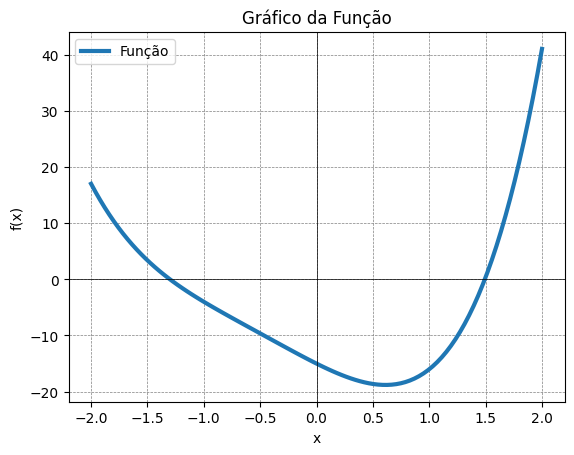

In [202]:
grafico(-2.0, 2.0, fa)

Ao analisar o gráfico, fica evidente que o método da secante encontrou uma raiz válida, embora tenha sido diferente dos resultados dos outros métodos. Isso pode ter acontecido devido à sensibilidade do método da secante aos valores iniciais fornecidos, que podem levar a trajetórias diferentes de convergência e resultando em soluções distintas.

No caso da função B (linha 2 da tabela), todos os métodos convergiram para resultados praticamente idênticos. As pequenas variações nas casas decimais reforçam a natureza aproximada das soluções numéricas, destacando a importância da compreensão da limitação de precisão.

No que diz respeito à função C (linha 3 da tabela), observamos resultados mais distintos entre os métodos, tornando interessante a plotagem do gráfico para visualizarmos a função:

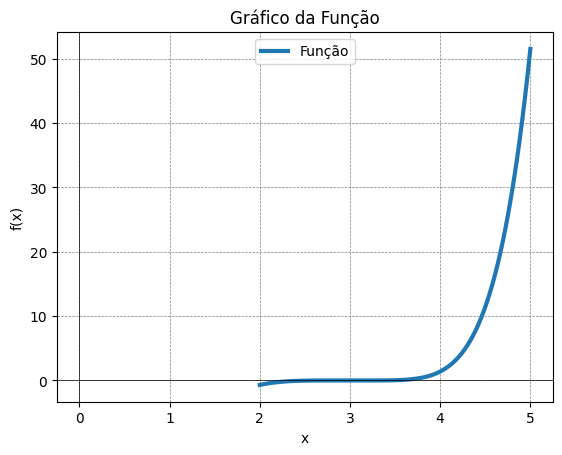

In [203]:
grafico(2.0, 5.0, fc)

Como é possível observar, a função possui uma reta muito próxima do eixo x, tocando-o apenas uma vez. Isso explica as dificuldades da Falsa Posição em convergir rapidamente para a raiz, já que a variação dos valores da função em relação a x é bastante sutil devido ao comportamento da função logarítmica. Embora a Falsa Posição ainda possa encontrar a solução, é provável que exija muito mais iterações para alcançar o resultado devido à natureza da função.


Além disso, vale destacar que os métodos da Bisseção e Falsa Posição proporcionam garantia de convergência, embora, como observado, possam exigir múltiplas iterações para atingir a solução. Em contrapartida, os métodos de Newton-Raphson e Secante dependem significativamente do ponto inicial fornecido, sendo essencial escolher um ponto próximo o suficiente da raiz desejada para assegurar a convergência.

*Análise 2: Número de iterações*

Agora, ao analisar o número de iterações, destaca-se que o método de Newton-Raphson demonstrou ser o mais eficiente em todas as execuções, registrando consistentemente um baixo número de iterações. Em contrapartida, o método da falsa posição apresentou valores bastante elevados em duas instâncias, indicando uma performance inferior nesse aspecto. Esse comportamento é esperado, visto que métodos como Newton-Raphson e Secante se utilizam de técnicas mais elaboradas para encontrar o resultado, enquanto que Bissecção e Falsa Posição são mais simples.
  
  
Esses resultados sublinham a importância de considerar o comportamento específico da função ao escolher o método mais adequado, evidenciando que não há uma abordagem única que seja a melhor em todos os casos.



*Análise 3: Esforço Computacional*

Apesar de o método de Newton-Raphson geralmente apresentar rápida convergência, resultando em um menor número de iterações, esse benefício vem acompanhado do custo computacional associado ao cálculo da sua derivada. Portanto, há um trade-off entre obter resultados eficientes e o esforço computacional envolvido nessa abordagem. Por outro lado, apesar do método da bisseção exigir um número maior de iterações, sua simplicidade o torna mais eficiente em termos de custo computacional já que utiliza operações matemáticas simples durante suas iterações.

Quanto à Falsa Posição, pode ser mais custoso computacionalmente em comparação com a bisseção, devido às suas interpolações lineares. Já o método da Secante, por não exigir o cálculo explícito da derivada da função, geralmente se situa entre a eficiência do Newton-Raphson e a da Falsa Posição.


Concluímos, portanto, que a escolha entre os métodos dependerá das características específicas da função, da precisão desejada e da disponibilidade de recursos computacionais. Cada método apresenta vantagens e limitações, e a seleção adequada se baseará na ponderação desses fatores em contextos específicos.